In [3]:
import numpy as np
from matplotlib import pyplot as plt
from dustmaps.config import config
from dustmaps.sfd import SFDQuery
from astropy.coordinates import SkyCoord
import astropy.units as u

In [4]:
ra = 2 * np.pi * (np.random.random(10000) - 0.5)
dec = np.arcsin(1. - np.random.random(10000) * 2)

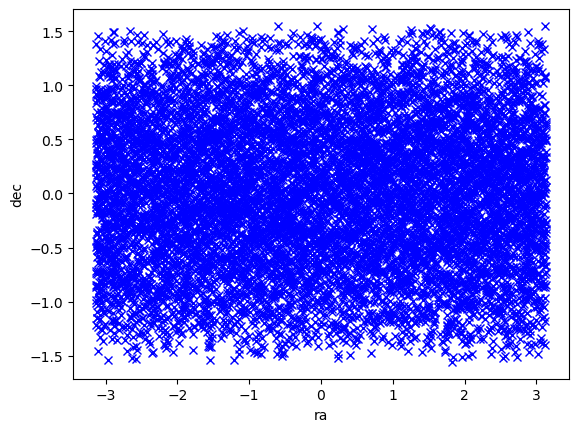

In [5]:
plt.plot(ra, dec, 'bx')
plt.xlabel('ra')
plt.ylabel('dec')
plt.show()

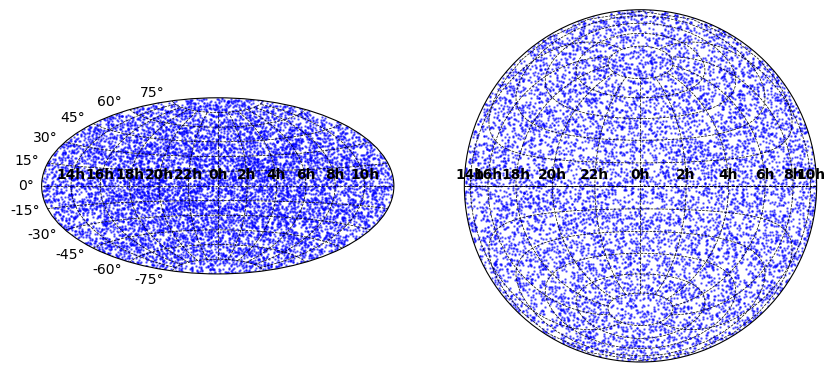

In [6]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(121, projection='aitoff')
ax.scatter(ra, dec, marker='o', color='b', s=0.7, alpha=0.5)
xlab = [f'{str(i)}h' for i in np.arange(14, 36, 2)%24]
ax.set_xticklabels(xlab, weight=800)
ax.grid(color='k', linestyle='--', linewidth=0.5)


ax = fig.add_subplot(122, projection='lambert')
ax.scatter(ra, dec, marker='o', color='b', s=0.7, alpha=0.5)
xlab = [f'{str(i)}h' for i in np.arange(14, 36, 2)%24]
ax.set_xticklabels(xlab, weight=800)
ax.grid(color='k', linestyle='--', linewidth=0.5)

In [67]:
dust_ra = [i for i in np.arange(0.5, 359.5, 1.)]
dust_dec = [i for i in np.arange(-89.5, 89.5, 1)]
RA, DEC = np.meshgrid(dust_ra, dust_dec)

In [76]:
# I am working on my laptop, so I just hardcoded this environmental variable.
config["data_dir"] = '/Users/kaiwenzhang/PycharmProjects/pythonProject/ASTR5160'
sfd = SFDQuery()
dust = sfd(SkyCoord(RA*u.deg, DEC*u.deg))

In [77]:
from astropy import wcs

In [97]:
w = wcs.WCS(naxis=2)
w.wcs.ctype = ['RA---AIT', 'DEC--AIT']
x, y = w.wcs_world2pix(RA, DEC, 1)

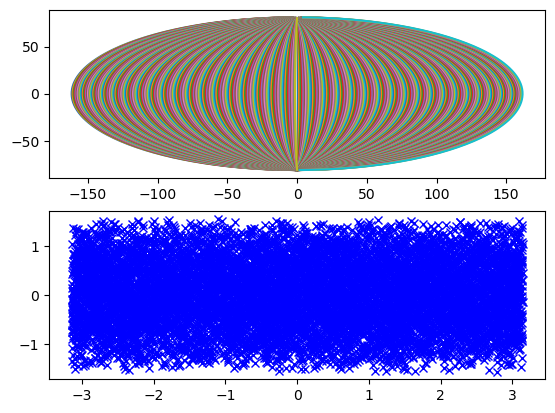

In [96]:
plt.subplot(2, 1, 1)
plt.plot(x, y)
plt.subplot(2, 1, 2)
plt.plot(ra, dec, 'bx')
plt.show()

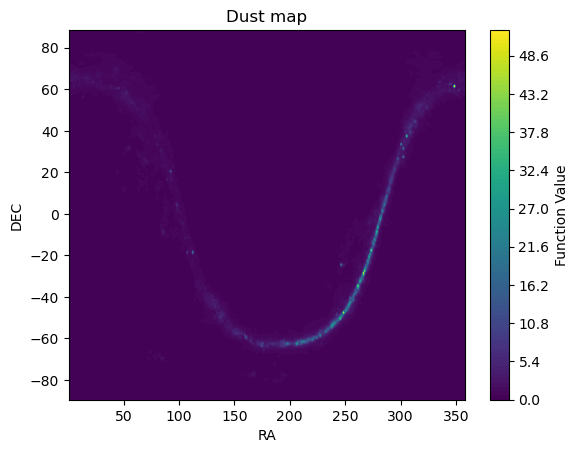

In [108]:
plt.contourf(dust_ra, dust_dec, dust, levels=100)  # 10 contour levels
plt.colorbar(label="Function Value")  # Add colorbar
plt.xlabel("RA")
plt.ylabel("DEC")
plt.title("Dust map")
plt.show()